Import Library & Load Dataset

In [1]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sklearn import preprocessing
from scipy.stats import pearsonr

In [2]:
model_data = pickle.load(open("stressLevel.sav", "rb"))
df = model_data["df"]
df['Tingkat Stress'].replace({'Low Stress':0, 'Stress Moderated':1, 'High Perceived Stress':2,}, inplace=True)

Korelasi antara variabel input dan output

<Figure size 1400x1000 with 0 Axes>

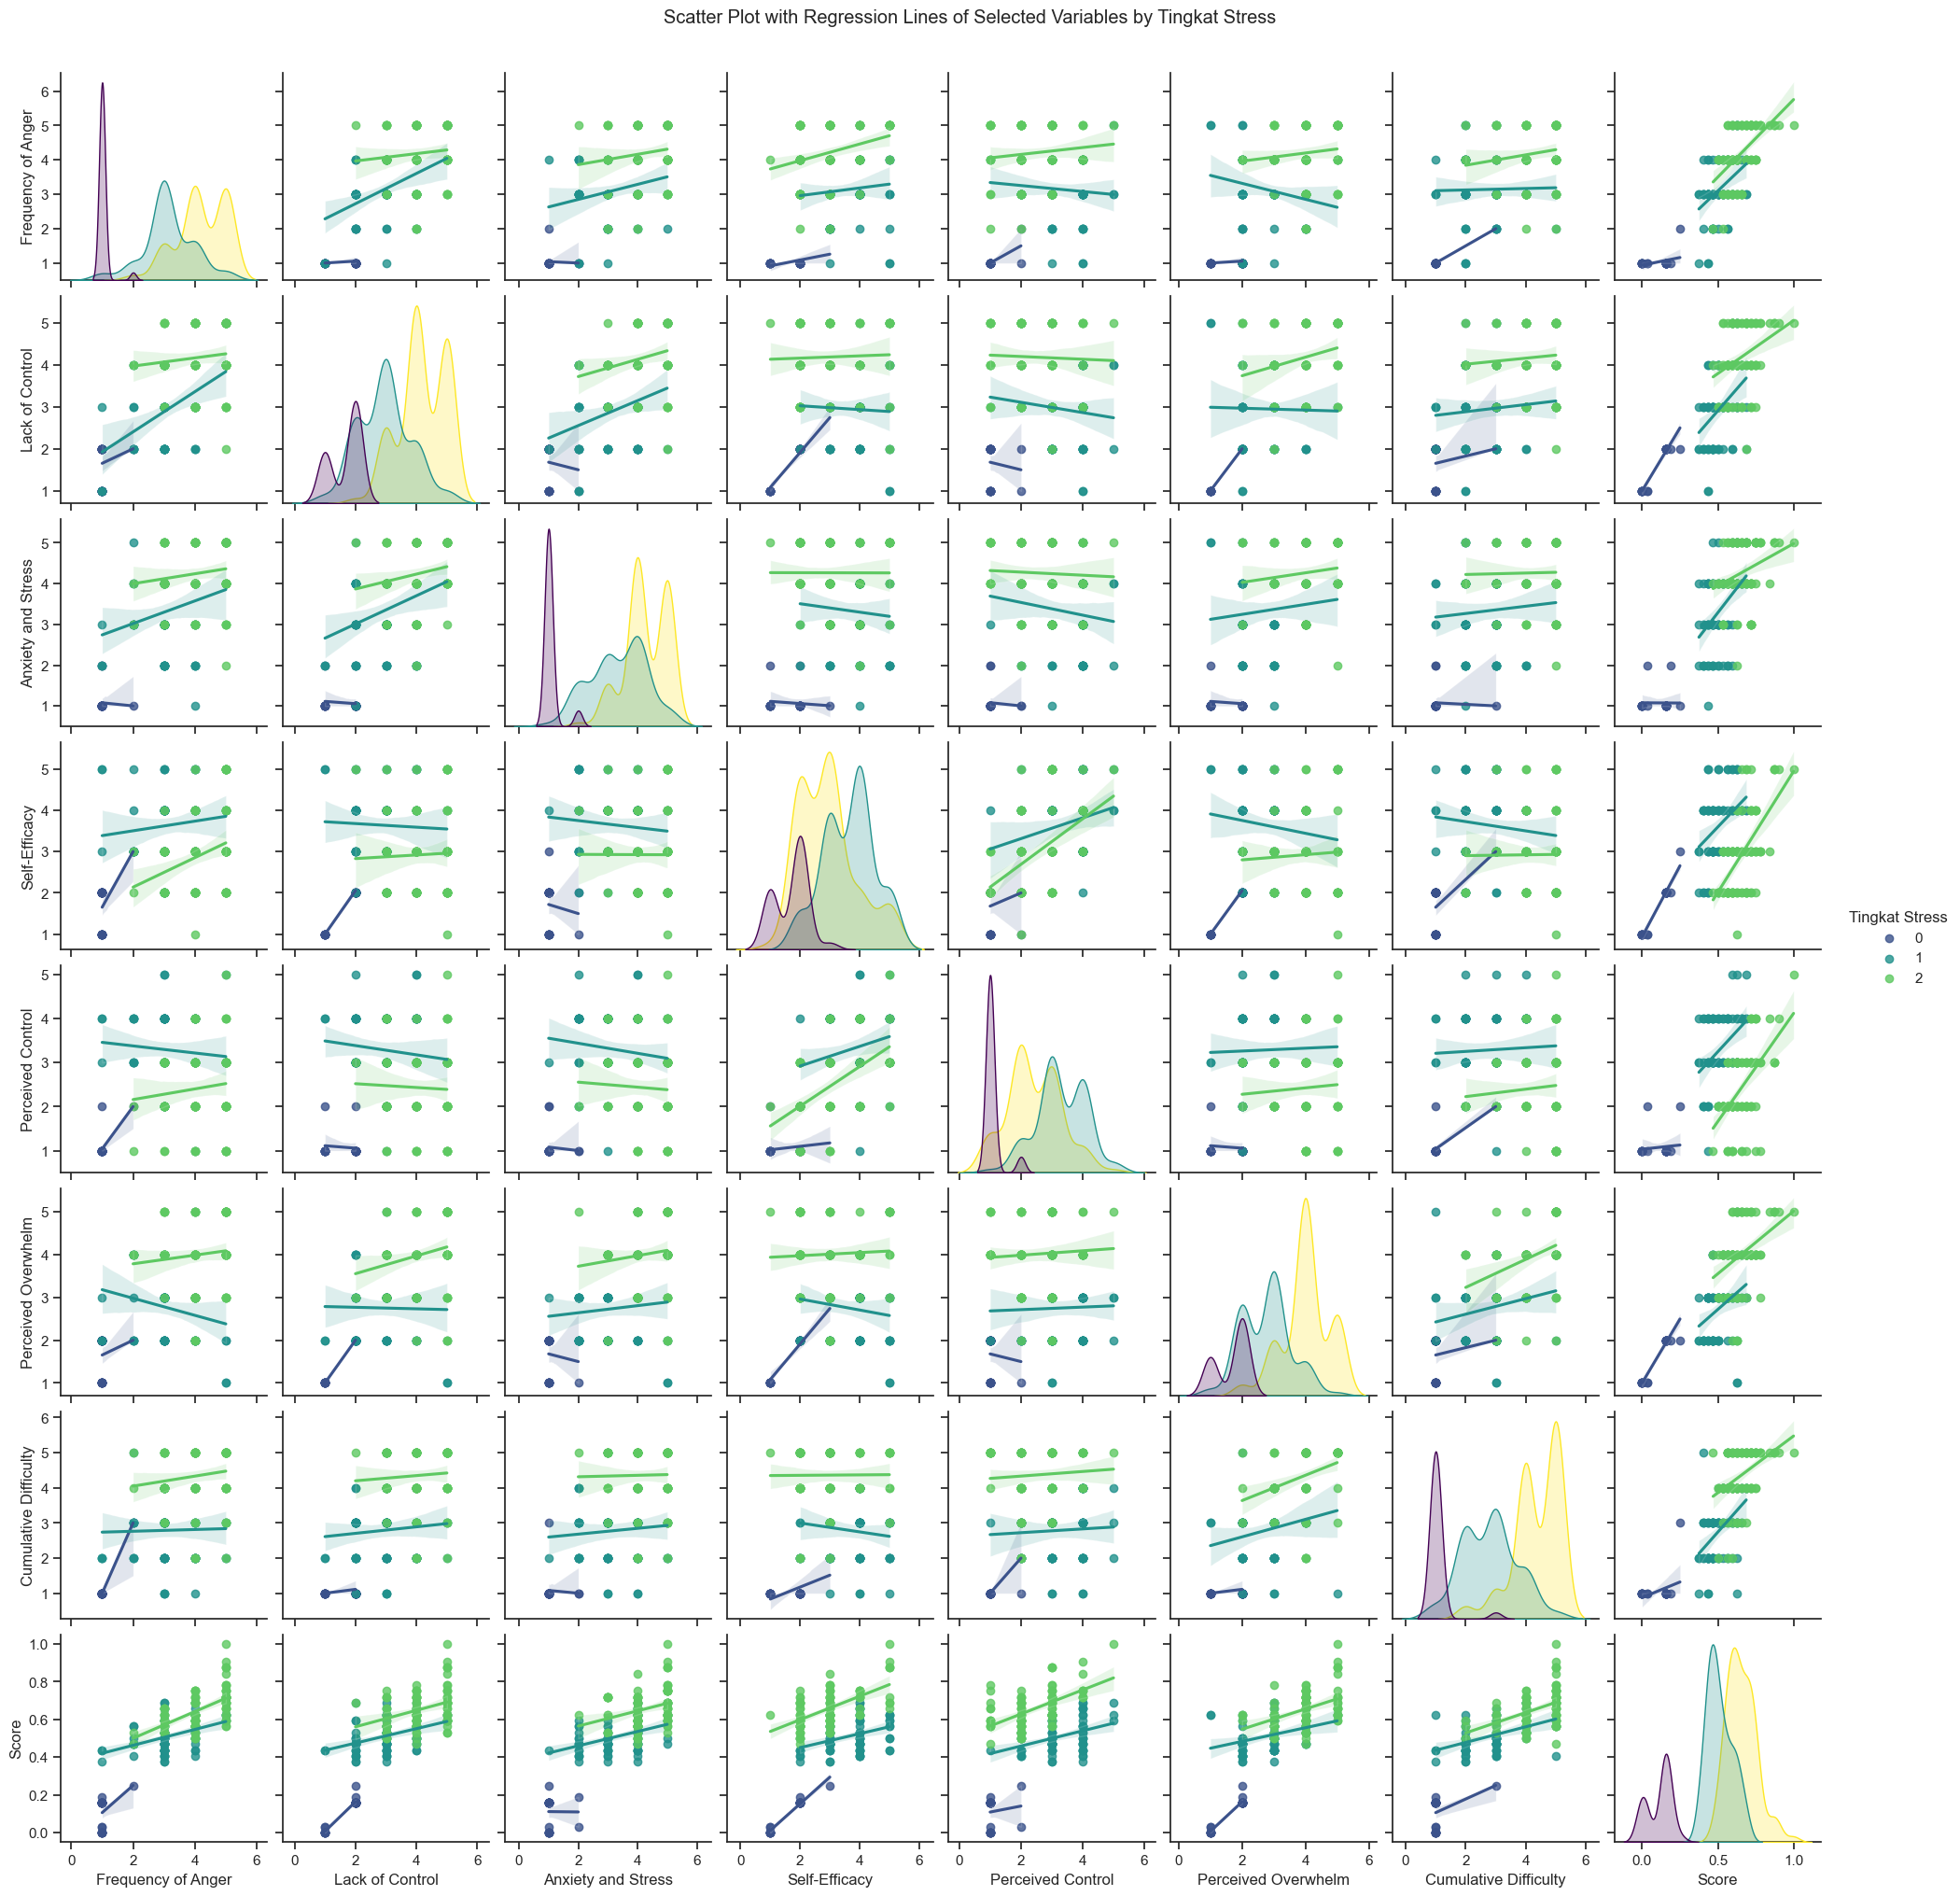

In [3]:
# Variabel-variabel yang akan digunakan dalam scatter plot
vars_to_plot = ['Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Cumulative Difficulty', 'Score']

# Membuat scatter plot dengan garis regresi
plt.figure(figsize=(14, 10))
sns.set(style="ticks")
scatter_plot = sns.pairplot(data=df, vars=vars_to_plot, hue='Tingkat Stress', palette='viridis', kind='reg')
scatter_plot.fig.suptitle('Scatter Plot with Regression Lines of Selected Variables by Tingkat Stress', y=1.02)
plt.show()

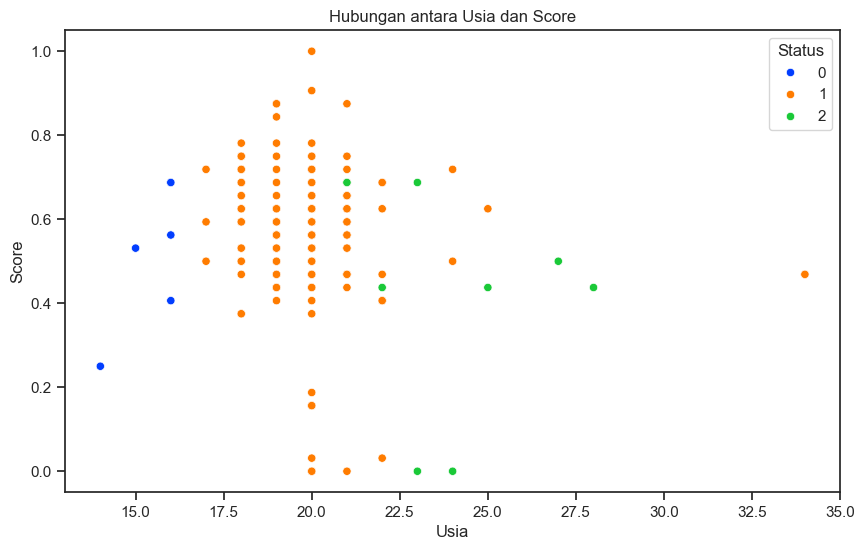

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df adalah DataFrame Anda
# Membuat scatter plot antara 'Usia' dan 'Jam Tidur Perhari' dengan warna berdasarkan 'Tingkat Stress'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Usia', y='Score', data=df, hue='Status', palette='bright')
plt.title('Hubungan antara Usia dan Score')
plt.xlabel('Usia')
plt.ylabel('Score')
plt.show()


2D Visualization

In [5]:
# Mengganti nilai 0, 1, 2 dengan label yang sesuai
df['Tingkat Stress'].replace({0: 'Low Stress', 1: 'Moderate Stress', 2: 'High Perceived Stress'}, inplace = True)
df['Jenis Kelamin'].replace({0: 'Laki-laki', 1: 'Perempuan'}, inplace = True)
df['Status'].replace({0:'Pelajar',1:'Mahasiswa',2:'Lainnya'}, inplace=True)
df['Bekerja'].replace({0:'Tidak',1:'Ya'}, inplace=True)


C:\Users\Airlangga\AppData\Local\Temp\ipykernel_29588\4105370407.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tingkat Stress', y='Usia', data=df, palette="viridis")


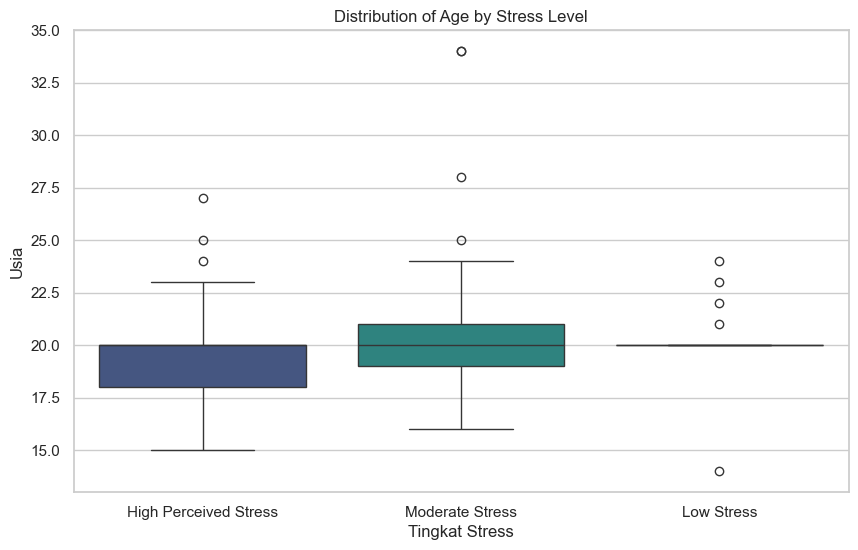

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh: Melihat distribusi Usia berdasarkan Tingkat Stress
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tingkat Stress', y='Usia', data=df, palette="viridis")
plt.title('Distribution of Age by Stress Level')
plt.show()


C:\Users\Airlangga\AppData\Local\Temp\ipykernel_29588\3663969761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tingkat Stress', data=df, palette='viridis')


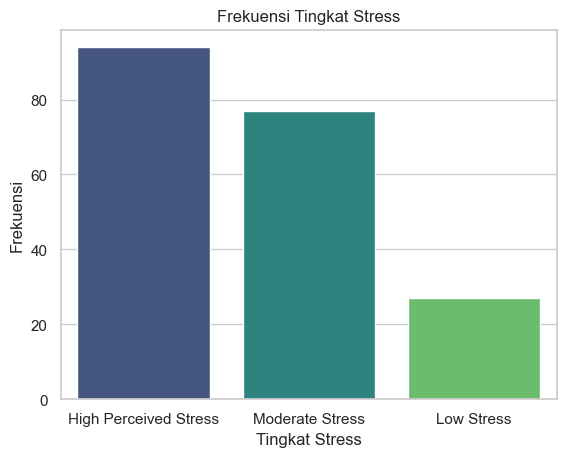

In [7]:
import seaborn as sns

# Bar Plot untuk Tingkat Stress
sns.countplot(x='Tingkat Stress', data=df, palette='viridis')
plt.title('Frekuensi Tingkat Stress')
plt.xlabel('Tingkat Stress')
plt.ylabel('Frekuensi')
plt.show()


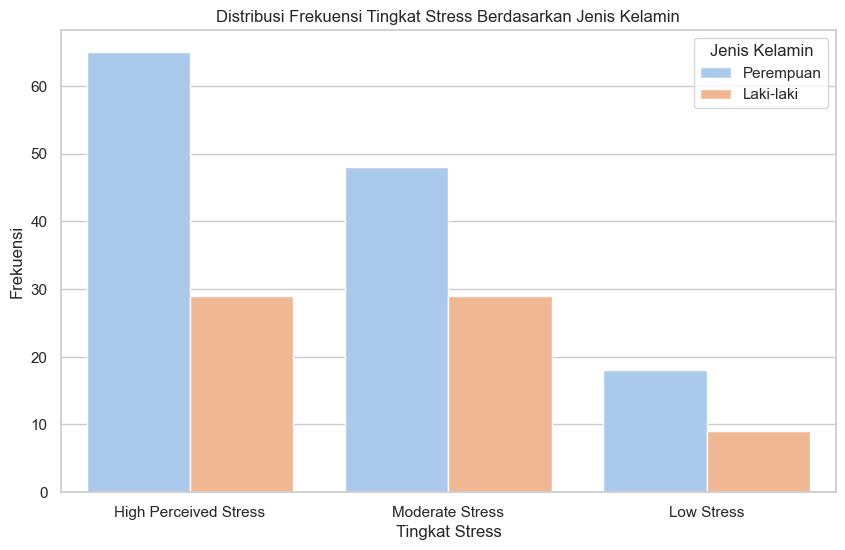

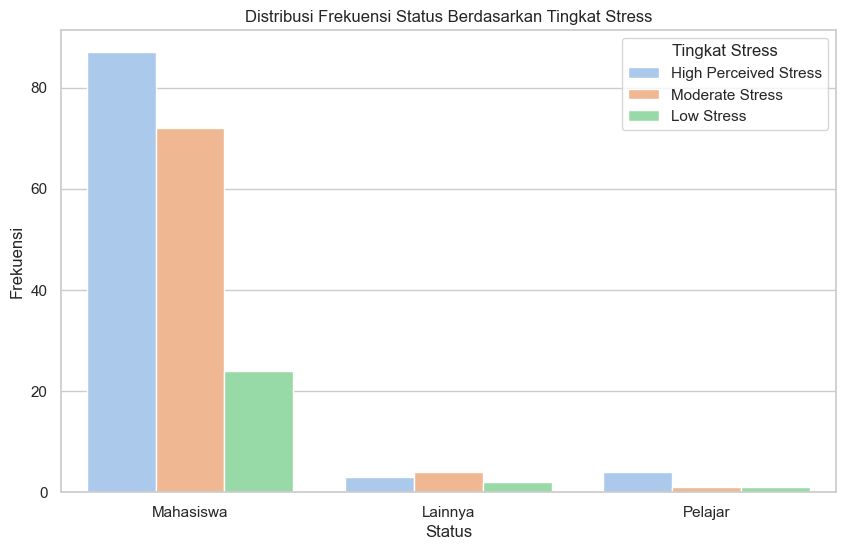

In [8]:

# Menghitung frekuensi masing-masing kategori
count_stress = df['Tingkat Stress'].value_counts()

# Membuat barplot dengan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Tingkat Stress', hue='Jenis Kelamin', data=df, palette='pastel')

# Menambahkan label dan judul
plt.xlabel('Tingkat Stress')
plt.ylabel('Frekuensi')
plt.title('Distribusi Frekuensi Tingkat Stress Berdasarkan Jenis Kelamin')

# Menampilkan plot
plt.show()

# Bar Plot untuk Variabel Kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', hue='Tingkat Stress', data=df, palette='pastel')
# Menambahkan label dan judul
plt.xlabel('Status')
plt.ylabel('Frekuensi')
plt.title('Distribusi Frekuensi Status Berdasarkan Tingkat Stress')
plt.show()


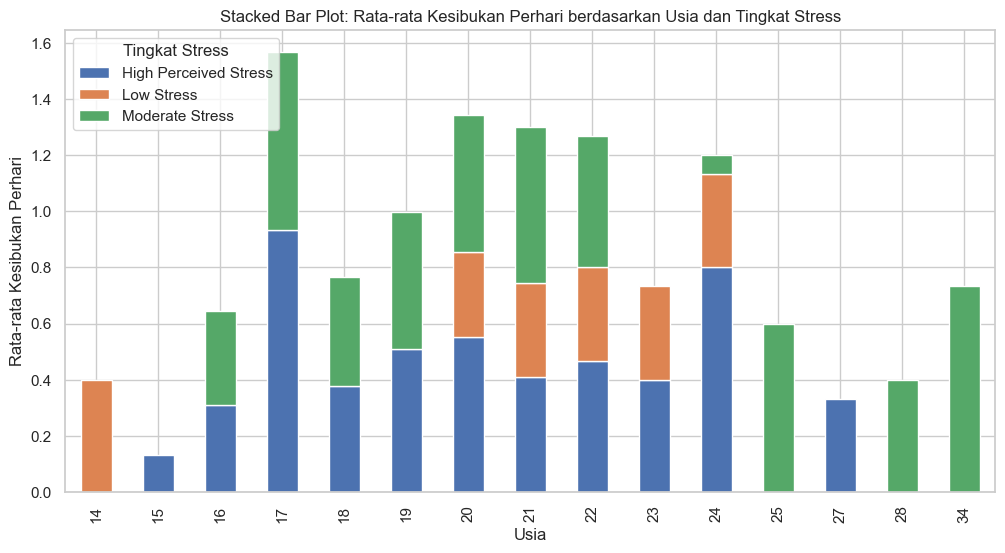

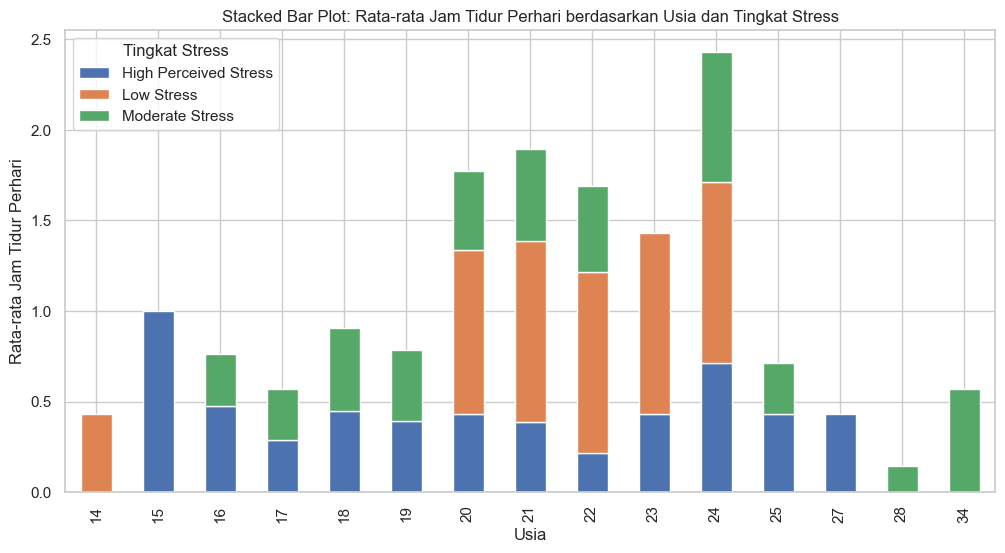

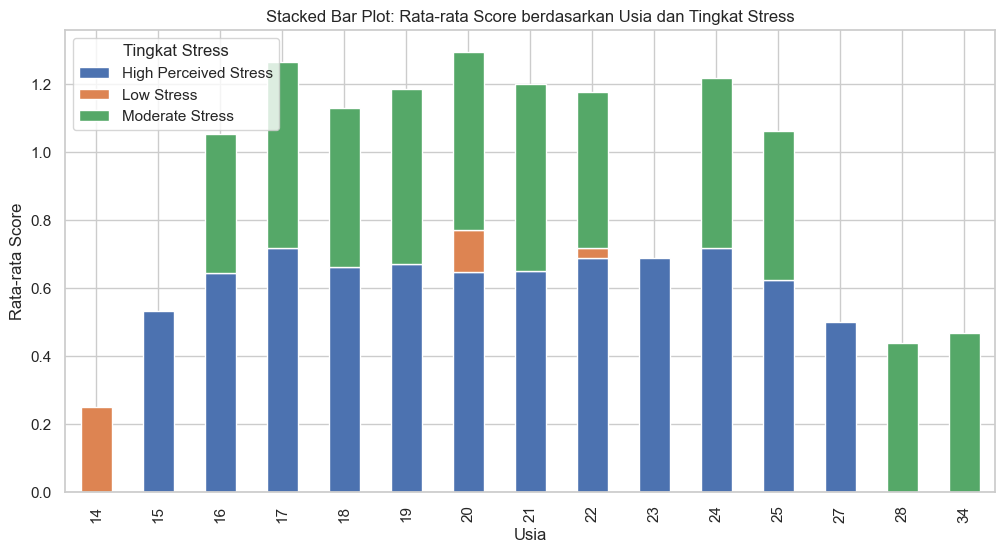

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame contoh
pivot_df = df.pivot_table(index='Usia', columns='Tingkat Stress', values='Kesibukan Perhari', aggfunc='mean')

# Membuat bar plot bertingkat
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot: Rata-rata Kesibukan Perhari berdasarkan Usia dan Tingkat Stress')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Kesibukan Perhari')
plt.legend(title='Tingkat Stress', loc='upper left')
plt.show()

# Bar plot untuk Jam Tidur Perhari
pivot_df = df.pivot_table(index='Usia', columns='Tingkat Stress', values='Jam Tidur Perhari', aggfunc='mean')
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot: Rata-rata Jam Tidur Perhari berdasarkan Usia dan Tingkat Stress')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Jam Tidur Perhari')
plt.legend(title='Tingkat Stress', loc='upper left')
plt.show()

# Bar plot untuk Jam Tidur Perhari
pivot_df = df.pivot_table(index='Usia', columns='Tingkat Stress', values='Score', aggfunc='mean')
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot: Rata-rata Score berdasarkan Usia dan Tingkat Stress')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Score')
plt.legend(title='Tingkat Stress', loc='upper left')
plt.show()


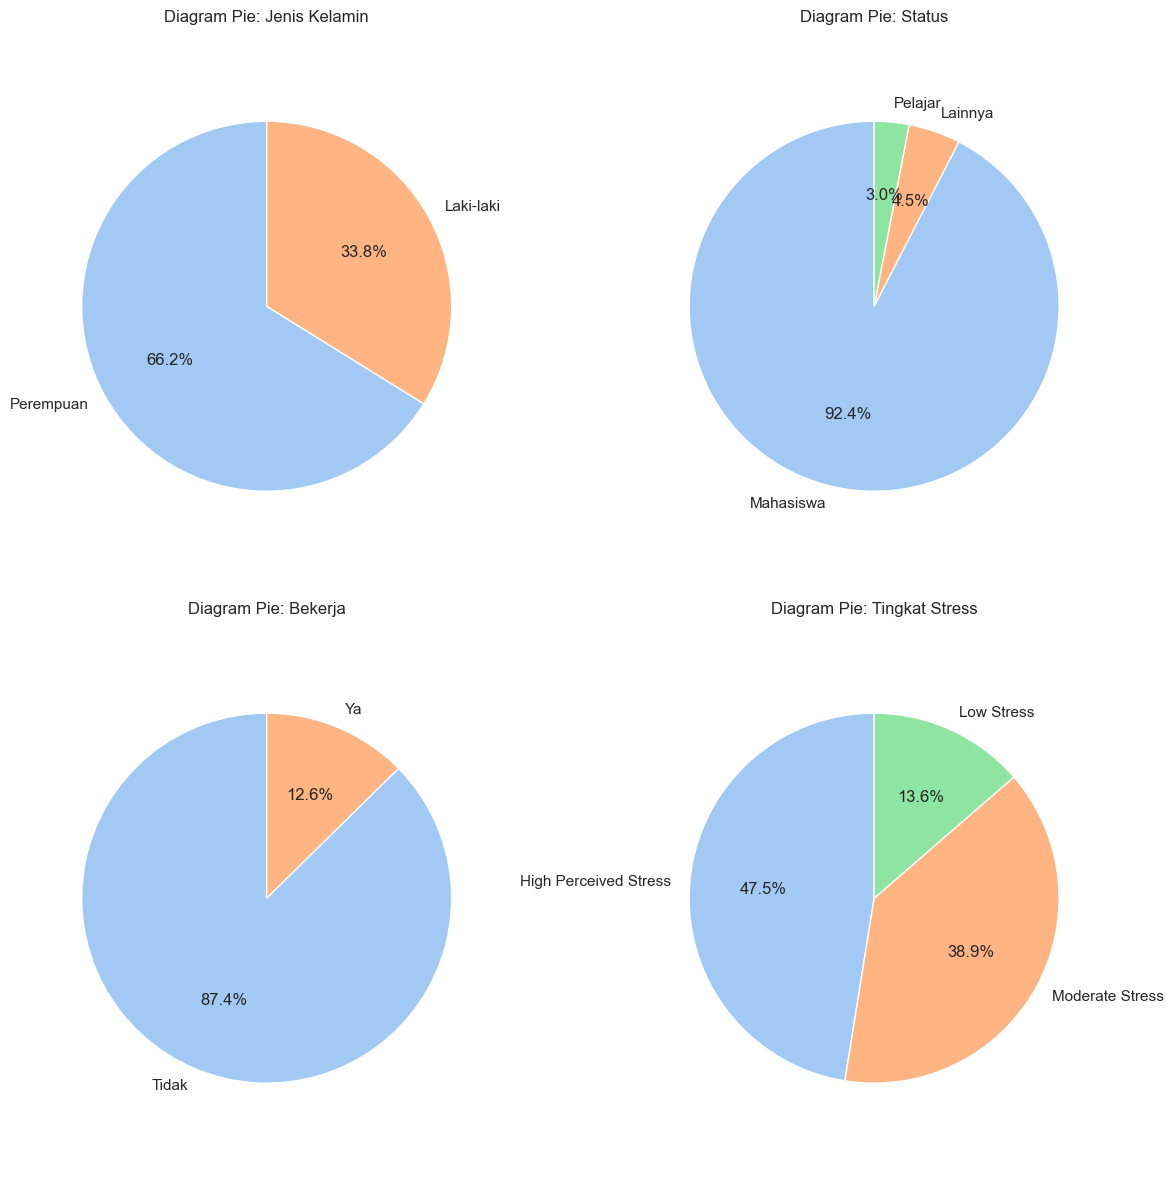

In [10]:
# Variabel input yang akan divisualisasikan
vars_to_plot = ['Jenis Kelamin','Status','Bekerja','Tingkat Stress']
# Menghitung jumlah variabel input
num_vars = len(vars_to_plot)

# Menentukan jumlah maksimum kolom (width) per baris
max_columns = 2

# Menghitung jumlah baris yang diperlukan
num_rows = (num_vars + max_columns - 1) // max_columns

# Membuat satu gambar dengan subplot sesuai dengan jumlah baris dan kolom
fig, axes = plt.subplots(num_rows, max_columns, figsize=(12, 6 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(vars_to_plot):
    row = i // max_columns
    col = i % max_columns

    if num_vars % max_columns != 0 and i == num_vars - 1:
        ax = axes[row, 0]
    else:
        ax = axes[row, col]

    # Menghitung jumlah data untuk masing-masing kategori
    category_counts = df[var].value_counts()

    # Mengambil label kategori
    categories = category_counts.index

    # Mengambil jumlah data untuk setiap kategori
    counts = category_counts.values

    # Membuat diagram pie dengan warna yang berbeda
    colors = sns.color_palette('pastel', len(categories))
    ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.axis('equal')  # Agar diagram pie menjadi lingkaran

    ax.set_title(f'Diagram Pie: {var}')

# Menyembunyikan subplot kosong jika ada
if num_vars % max_columns != 0:
    axes[num_rows - 1, -1].axis('off')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

In [11]:
df

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Cluster,Tingkat Stress,Timestamp
0,19,Perempuan,Mahasiswa,Tidak,0.494228,0.333333,4,3,5,2,3,5,1,5,0.62500,0,High Perceived Stress,2023-10-07 16:07:39.724
1,20,Laki-laki,Mahasiswa,Ya,0.000000,0.800000,5,5,5,4,3,2,1,2,0.59375,2,Moderate Stress,2023-09-29 09:55:57.361
2,22,Perempuan,Mahasiswa,Tidak,0.000000,0.333333,5,5,5,2,2,5,1,5,0.68750,0,High Perceived Stress,2023-10-06 13:38:13.700
3,18,Perempuan,Mahasiswa,Ya,0.000000,0.466667,4,3,5,2,2,4,1,4,0.53125,0,High Perceived Stress,2023-10-06 14:19:37.871
4,18,Perempuan,Mahasiswa,Tidak,0.000000,0.066667,3,5,5,2,1,5,1,5,0.59375,0,High Perceived Stress,2023-10-06 22:32:05.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,20,Perempuan,Mahasiswa,Tidak,1.000000,0.333333,1,2,1,2,1,2,3,1,0.15625,1,Low Stress,2023-10-06 13:28:24.864
194,18,Perempuan,Mahasiswa,Tidak,0.714286,0.400000,4,3,4,2,2,3,2,4,0.50000,0,High Perceived Stress,2023-10-02 17:12:14.044
195,19,Perempuan,Mahasiswa,Tidak,0.714286,0.466667,5,5,5,5,3,5,3,5,0.87500,0,High Perceived Stress,2023-10-02 18:51:01.290
196,22,Laki-laki,Mahasiswa,Ya,0.714286,0.600000,3,2,2,4,4,2,1,3,0.40625,2,Moderate Stress,2023-10-06 10:15:58.022


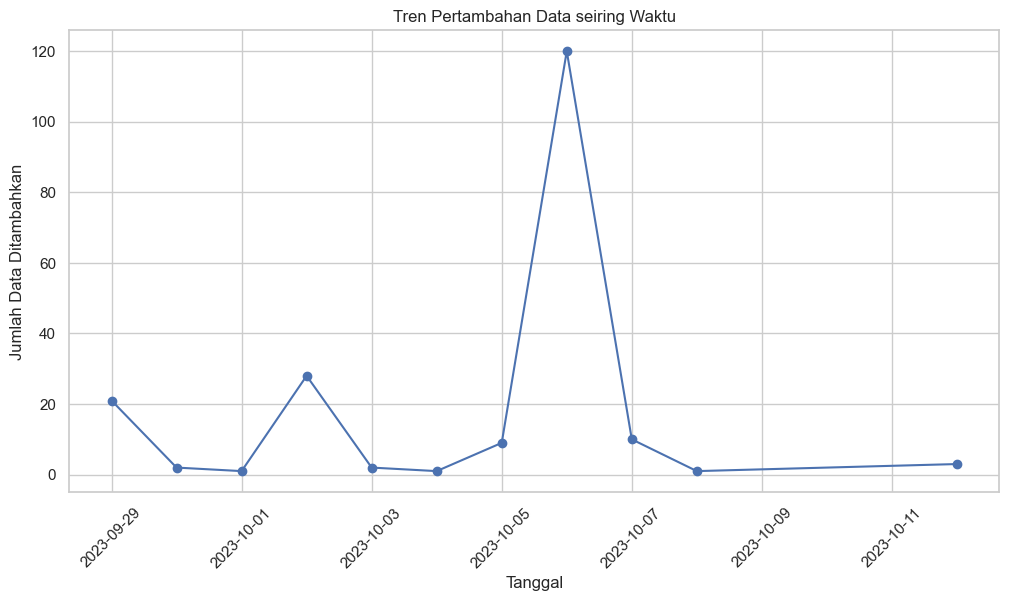

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsikan df memiliki kolom 'Timestamp'
# Pastikan 'Timestamp' dalam format datetime yang tepat
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Hitung jumlah total data yang ditambahkan pada setiap tanggal
df['Count'] = 1  # Tambahkan kolom 'Count' dengan nilai 1
grouped_df = df.groupby(df['Timestamp'].dt.date)['Count'].sum().reset_index()

# Membuat plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Timestamp'], grouped_df['Count'], marker='o', linestyle='-')

plt.title('Tren Pertambahan Data seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data Ditambahkan')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

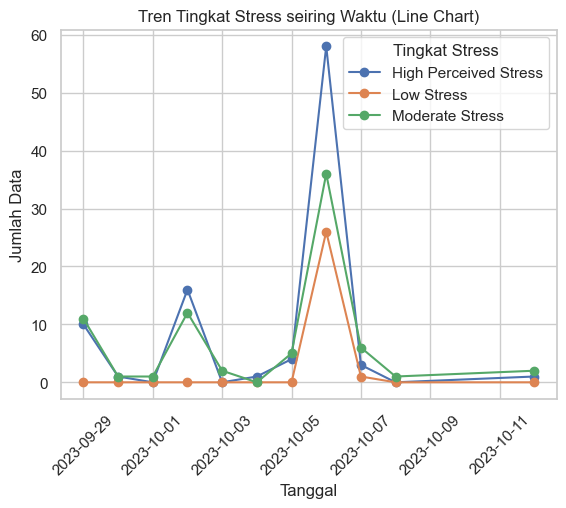

<Figure size 1200x600 with 0 Axes>

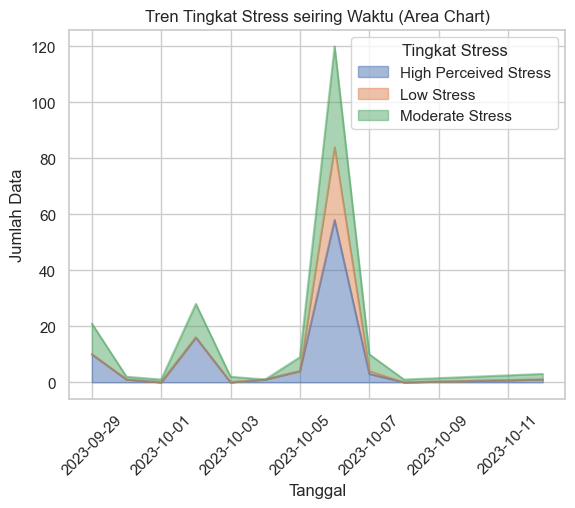

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan 'Timestamp' dalam format datetime yang tepat
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Hitung jumlah data untuk setiap tingkat stres pada setiap tanggal
grouped_df = df.groupby([df['Timestamp'].dt.date, 'Tingkat Stress']).size().unstack(fill_value=0)

# Membuat Line Chart
plt.figure(figsize=(12, 6))
grouped_df.plot(kind='line', marker='o', linestyle='-')
plt.title('Tren Tingkat Stress seiring Waktu (Line Chart)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.legend(title='Tingkat Stress')
plt.show()

# Membuat Area Chart
plt.figure(figsize=(12, 6))
grouped_df.plot(kind='area', stacked=True, alpha=0.5)
plt.title('Tren Tingkat Stress seiring Waktu (Area Chart)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.legend(title='Tingkat Stress')
plt.show()


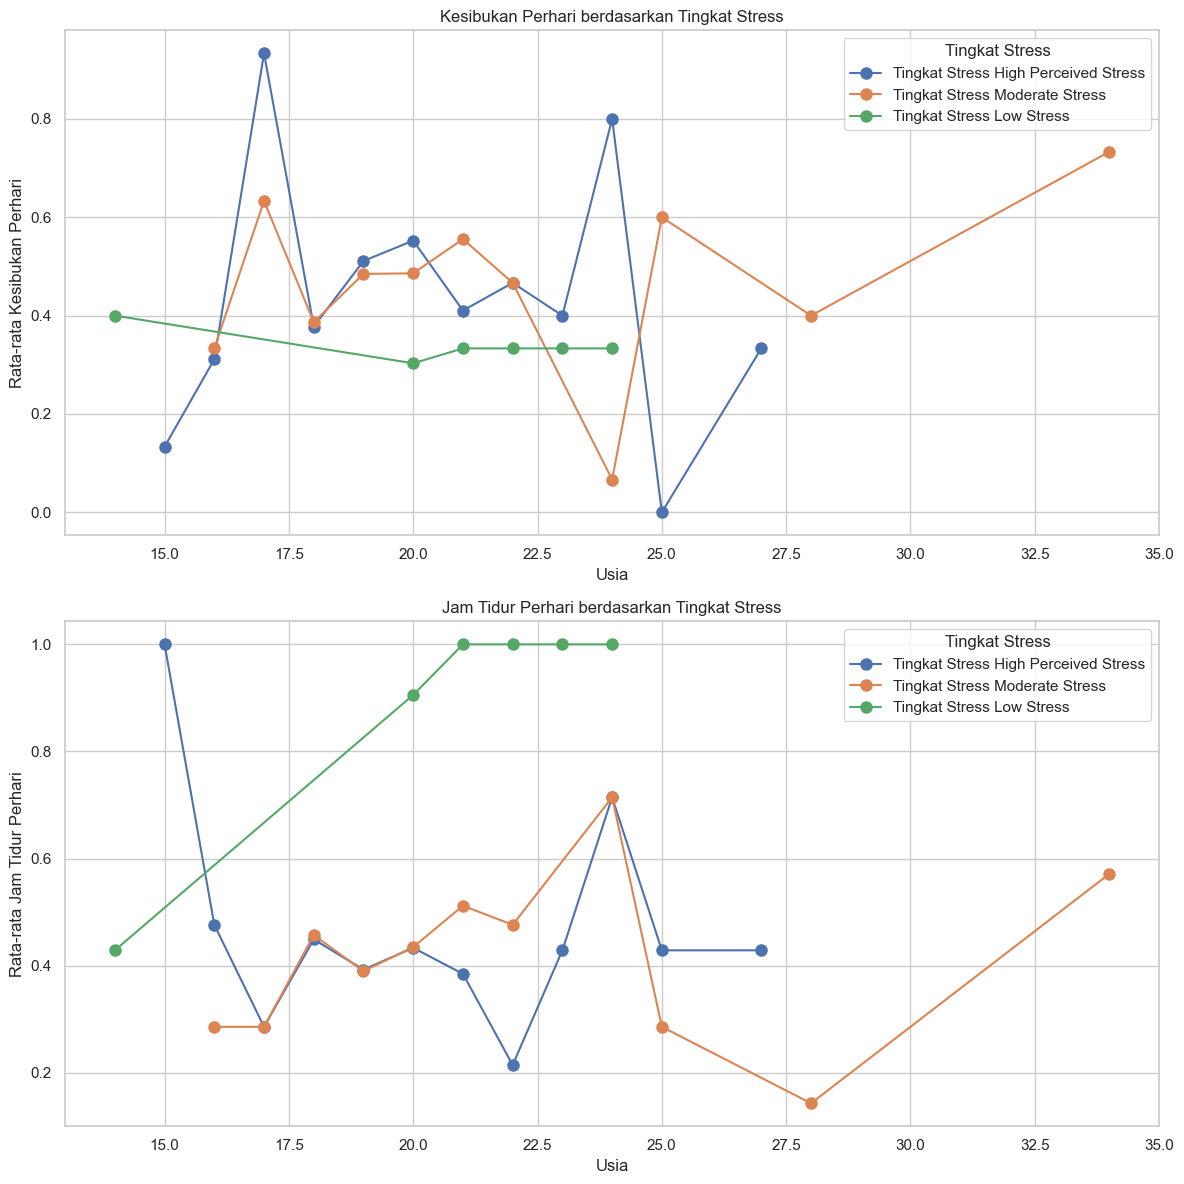

In [14]:
import matplotlib.pyplot as plt

# Mengatur ukuran keseluruhan figur
plt.figure(figsize=(12, 12))

# Subplot untuk 'Kesibukan Perhari'
plt.subplot(2, 1, 1)  # 2 baris, 1 kolom, posisi pertama
for tingkat_stress in df['Tingkat Stress'].unique():
    sub_data = df[df['Tingkat Stress'] == tingkat_stress]
    plt.plot(sub_data.groupby('Usia')['Kesibukan Perhari'].mean(), marker='o', linestyle='-', markersize=8, label=f'Tingkat Stress {tingkat_stress}')

plt.title('Kesibukan Perhari berdasarkan Tingkat Stress')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Kesibukan Perhari')
plt.legend(title='Tingkat Stress')
plt.grid(True)

# Subplot untuk 'Jam Tidur Perhari'
plt.subplot(2, 1, 2)  # 2 baris, 1 kolom, posisi kedua
for tingkat_stress in df['Tingkat Stress'].unique():
    sub_data = df[df['Tingkat Stress'] == tingkat_stress]
    plt.plot(sub_data.groupby('Usia')['Jam Tidur Perhari'].mean(), marker='o', linestyle='-', markersize=8, label=f'Tingkat Stress {tingkat_stress}')

plt.title('Jam Tidur Perhari berdasarkan Tingkat Stress')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Jam Tidur Perhari')
plt.legend(title='Tingkat Stress')
plt.grid(True)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


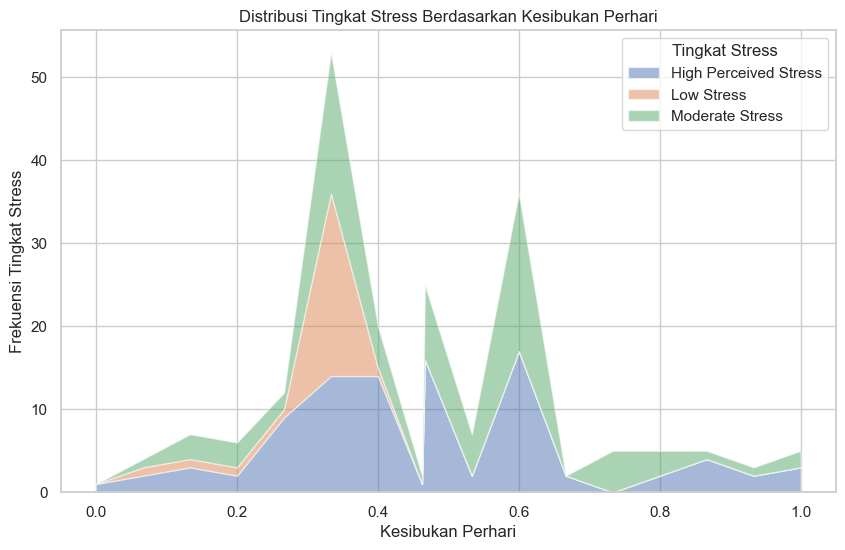

In [15]:
# Menghitung frekuensi tingkat stress per interval Kesibukan Perhari
stress_counts = df.groupby('Kesibukan Perhari')['Tingkat Stress'].value_counts().unstack().fillna(0)

# Membuat area chart
plt.figure(figsize=(10, 6))
plt.stackplot(stress_counts.index, stress_counts.transpose(), labels=stress_counts.columns, alpha=0.5)

# Menambahkan label dan judul
plt.xlabel('Kesibukan Perhari')
plt.ylabel('Frekuensi Tingkat Stress')
plt.title('Distribusi Tingkat Stress Berdasarkan Kesibukan Perhari')
plt.legend(title='Tingkat Stress')

# Menampilkan plot
plt.show()

<Figure size 1200x600 with 0 Axes>

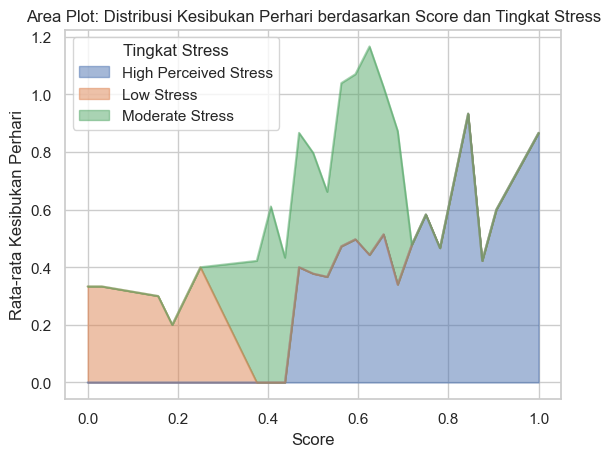

<Figure size 1200x600 with 0 Axes>

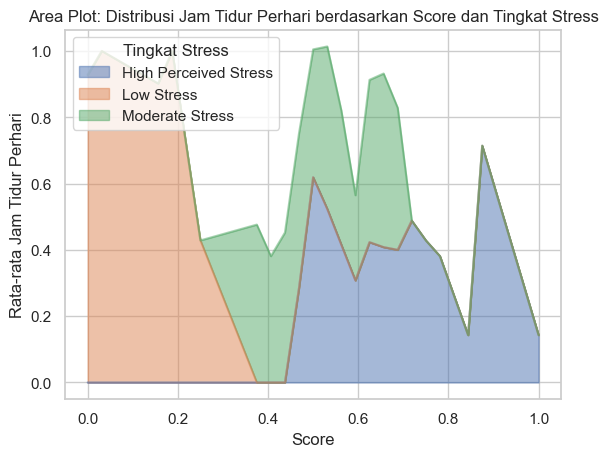

In [16]:
import matplotlib.pyplot as plt

pivot_df1 = df.pivot_table(index='Score', columns='Tingkat Stress', values='Kesibukan Perhari', aggfunc='mean')
plt.figure(figsize=(12, 6))
pivot_df1.plot(kind='area', alpha=0.5, stacked=True)
plt.title('Area Plot: Distribusi Kesibukan Perhari berdasarkan Score dan Tingkat Stress')
plt.xlabel('Score')
plt.ylabel('Rata-rata Kesibukan Perhari')
plt.legend(title='Tingkat Stress', loc='upper left')
plt.show()

pivot_df2 = df.pivot_table(index='Score', columns='Tingkat Stress', values='Jam Tidur Perhari', aggfunc='mean')
plt.figure(figsize=(12, 6))
pivot_df2.plot(kind='area', alpha=0.5, stacked=True)
plt.title('Area Plot: Distribusi Jam Tidur Perhari berdasarkan Score dan Tingkat Stress')
plt.xlabel('Score')
plt.ylabel('Rata-rata Jam Tidur Perhari')
plt.legend(title='Tingkat Stress', loc='upper left')
plt.show()


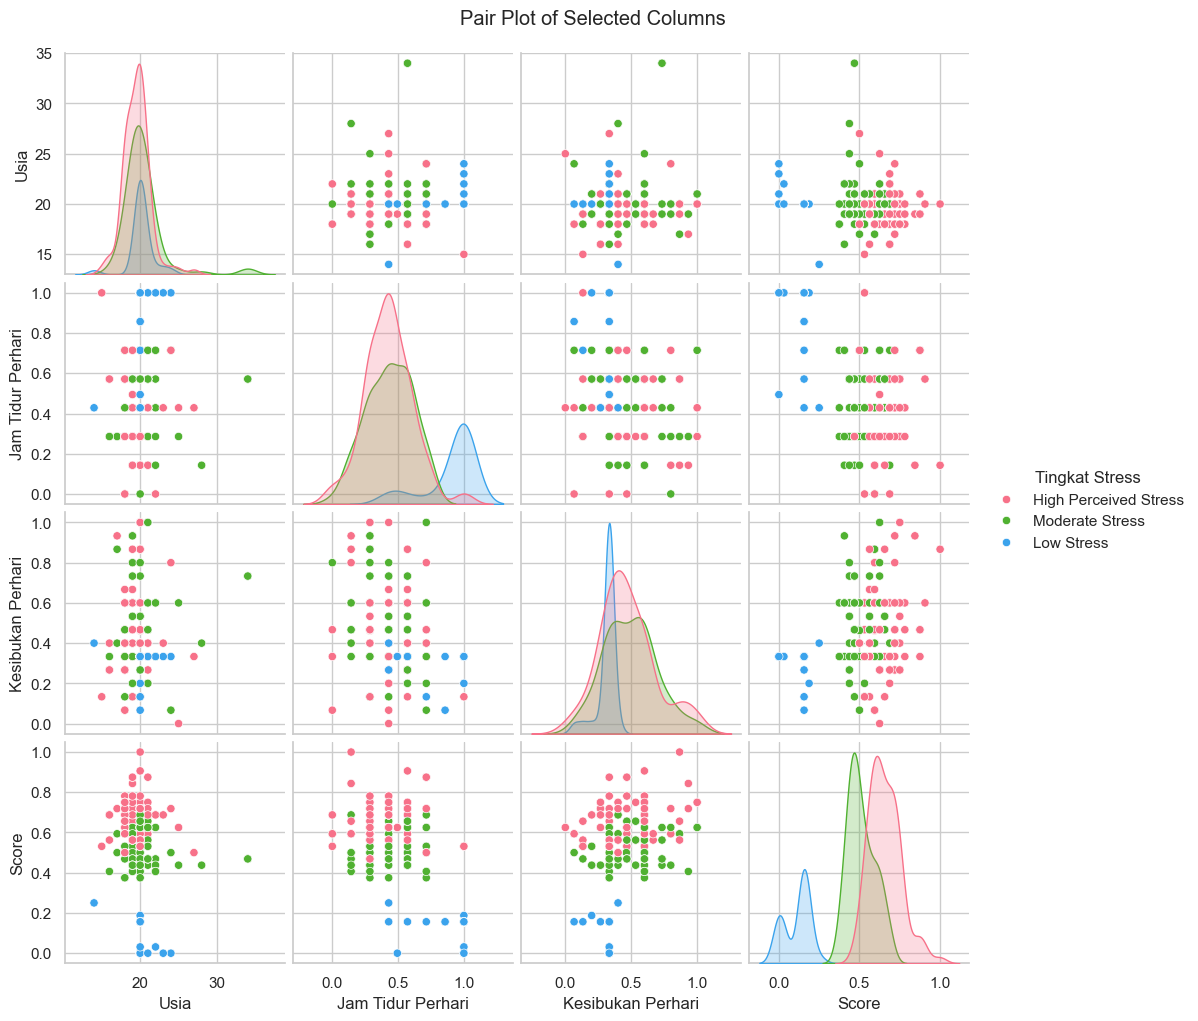

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih beberapa kolom yang ingin divisualisasikan
selected_columns = ['Usia', 'Jam Tidur Perhari', 'Kesibukan Perhari','Score']

# Tambahkan kolom 'Tingkat Stress' untuk pewarnaan
selected_columns_with_stress = selected_columns + ['Tingkat Stress']

# Buat pair plot
sns.pairplot(df[selected_columns_with_stress], hue='Tingkat Stress', markers="o", palette="husl")
plt.suptitle("Pair Plot of Selected Columns", y=1.02)
plt.show()


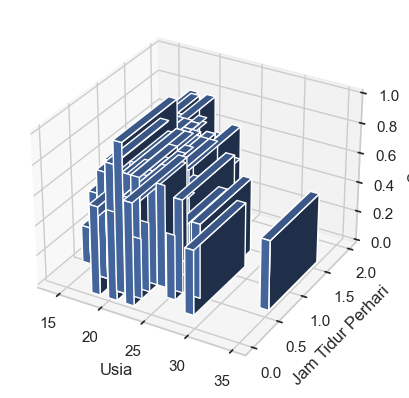

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(df['Usia'])
y = np.array(df['Jam Tidur Perhari'])
z = np.zeros_like(x)
dx = dy = np.ones_like(z)
dz = np.array(df['Score'])

ax.bar3d(x, y, z, dx, dy, dz)
ax.set_xlabel('Usia')
ax.set_ylabel('Jam Tidur Perhari')
ax.set_zlabel('Score')

plt.show()


In [19]:
from pygooglechart import PieChart3D

# Menghitung jumlah untuk setiap kategori di 'Tingkat Stress'
counts = df['Tingkat Stress'].value_counts()

# Menghitung persentase
total = counts.sum()
percentages = [(count / total) * 100 for count in counts]

# Membuat label dengan persentase
labels_with_percentage = [f'{label}: {percentage:.2f}%' for label, percentage in zip(counts.index, percentages)]

# Membuat PieChart3D
chart = PieChart3D(800, 300)

# Menambahkan data ke chart
chart.add_data(counts.values)

# Menentukan label dengan persentase
chart.set_pie_labels(labels_with_percentage)

# Menyimpan chart sebagai gambar
chart.download('3d_pie_chart_with_percentage.png')

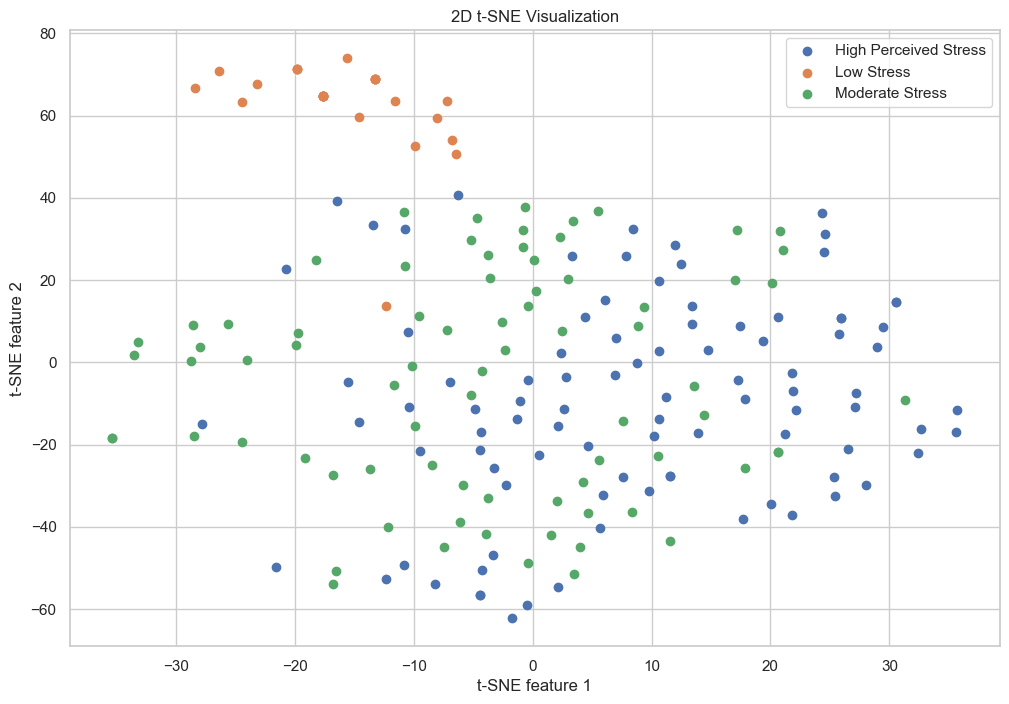

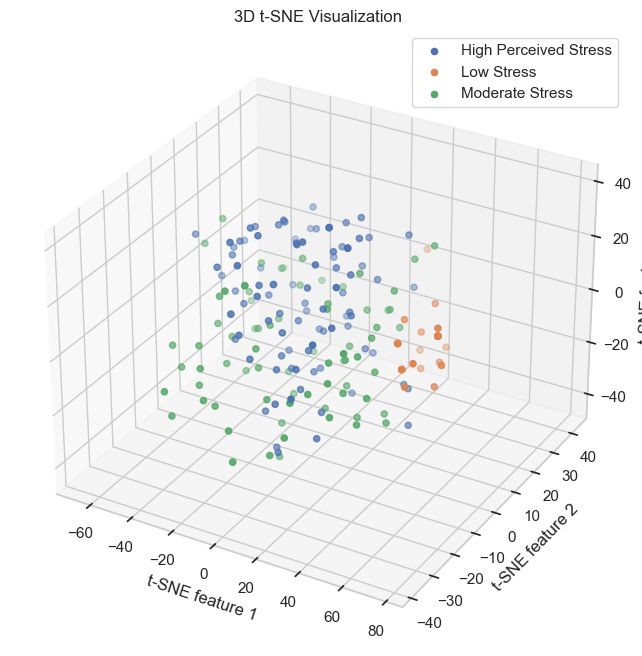

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler

# Data Anda: df, fitur_kolom, dan target 'Tingkat Stress'
fitur_kolom = ['Usia', 'Jam Tidur Perhari', 'Kesibukan Perhari', 'Score']
X = df[fitur_kolom]
y = df['Tingkat Stress']

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE untuk 2D
tsne_2d = TSNE(n_components=2, random_state=0)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

# t-SNE untuk 3D
tsne_3d = TSNE(n_components=3, random_state=0)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# Visualisasi 2D
plt.figure(figsize=(12, 8))
for i in np.unique(y):
    plt.scatter(X_tsne_2d[y == i, 0], X_tsne_2d[y == i, 1], label=i)
plt.legend()
plt.title("2D t-SNE Visualization")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.show()

# Visualisasi 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(y):
    ax.scatter(X_tsne_3d[y == i, 0], X_tsne_3d[y == i, 1], X_tsne_3d[y == i, 2], label=i)
ax.legend()
ax.set_title("3D t-SNE Visualization")
ax.set_xlabel("t-SNE feature 1")
ax.set_ylabel("t-SNE feature 2")
ax.set_zlabel("t-SNE feature 3")
plt.show()


In [21]:

# # Menghitung jumlah observasi untuk setiap kombinasi Jenis Kelamin dan Status
# grouped = df.groupby(['Jenis Kelamin', 'Status']).size().reset_index(name='count')

# # Data untuk pie chart
# labels = grouped['Status']
# sizes = grouped['count']
# colors = ['lightcoral', 'lightskyblue']
# explode = (0.1, 0)  # Pie chart pieces will be exploded

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Membuat sebuah lingkaran dengan ukuran yang sama sebagai dasar untuk pie chart
# theta = np.linspace(0, 2 * np.pi, 100)
# r = 1
# x = r * np.cos(theta)
# y = r * np.sin(theta)
# z = np.zeros(100)

# # Menggambar dasar lingkaran
# ax.plot(x, y, z, color='gray', lw=1)

# # Membuat pie chart dalam 3D
# verts = [list(zip(x, y, z))]
# for i in range(len(labels)):
#     values = sizes[i]
#     angle = 360 * (values / sum(sizes))
#     start = i * (360 / len(labels))
#     end = start + angle
#     verts.append(list(zip(x, y, z)))
#     for j in range(100):
#         verts[i + 1][j] = (
#             r * np.cos(np.radians(start + (j / 100) * angle)),
#             r * np.sin(np.radians(start + (j / 100) * angle)),
#             0
#         )

# poly = Poly3DCollection(verts, facecolors=colors, alpha=0.7)
# ax.add_collection3d(poly)

# ax.set_title('Pie Chart 3D')
# ax.set_zlabel('Jenis Kelamin')
# ax.set_zticks([])
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# plt.show()